<a href="https://colab.research.google.com/github/TomJiX/ML_start/blob/main/Master_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cavitation model

In [2]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
from scipy.integrate import odeint,solve_ivp
import scipy as sc

 $$ R{\frac {d^{2}R}{dt^{2}}}+{\frac {3}{2}}\left({\frac {dR}{dt}}\right)^{2}+{\frac {4\nu _{L}}{R}}{\frac {dR}{dt}}+{\frac {2\gamma }{\rho _{L}R}}+{\frac {p_{\inf}-p_{v}}{\rho _{L}}}=0$$

 $$ {\frac {d^{2}R}{dt^{2}}}=-\frac {1}{R}\Bigg [{\frac {3}{2}}\left({\frac {dR}{dt}}\right)^{2}+{\frac {4\nu _{L}}{R}}{\frac {dR}{dt}}+{\frac {2\gamma }{\rho _{L}R}}+{\frac {p_{\inf}-p_{v}}{\rho _{L}}}\Bigg ]$$

In [3]:
def Ray_Ple(U,t,nu_l=1E-3,gamma=7.73E-2,rho_l=1E3,p_inf=1E5,pv=2.33E3):
  return [U[1],-(1/U[0])*(1.5*(U[1]**2)+4*nu_l*U[1]/U[0]+2*gamma/(rho_l*U[0])+(p_inf-pv)/rho_l)]

def t2burst(R0,rho_l,p_inf,p_v):
  return 0.915*R0*np.sqrt(rho_l/(p_inf-p_v))

def rad_ener(E_las,p_inf):
  return ((0.006*E_las+0.197)*1e-3*3/(4*np.pi*p_inf))**(1/3)

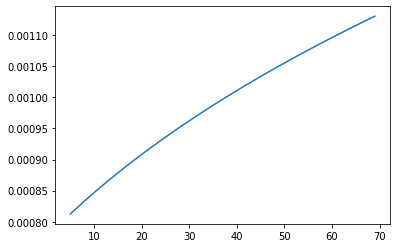

In [4]:
rho_l=1E3
p_inf=1.01E5
p_v=2.33E3


E_las=np.arange(5,70,1)
rad=rad_ener(E_las,p_inf)
plt.plot(E_las,rad)

8.40e-05
8.80e-05
9.00e-05
9.30e-05
9.60e-05


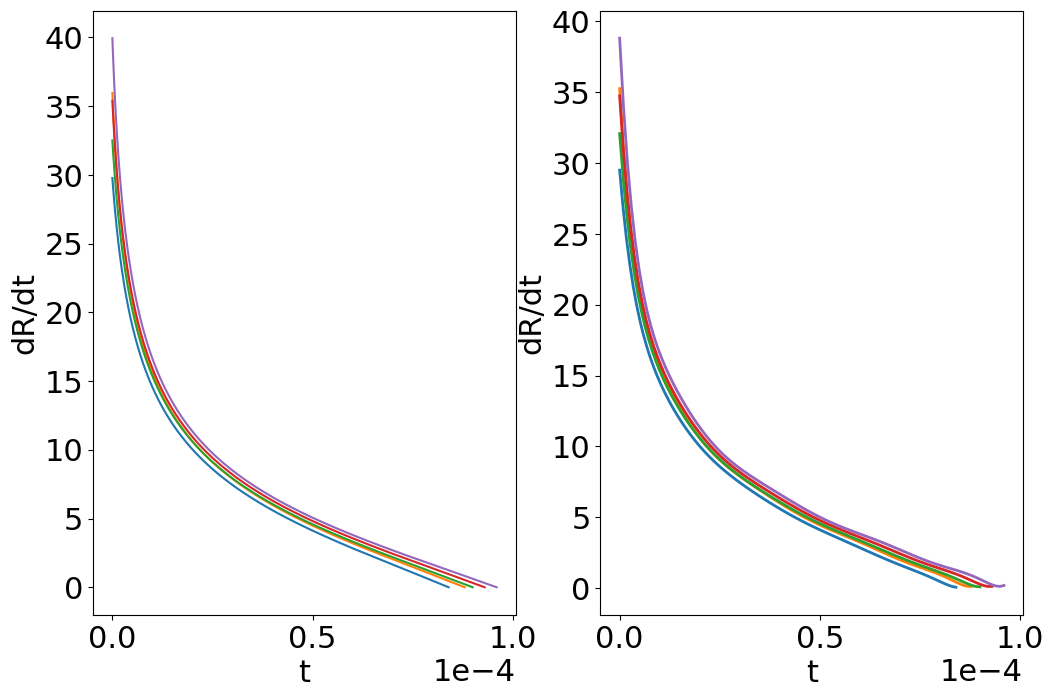

In [19]:
E_las=[5,10,15,20,25]

plt.rcParams.update({'font.size': 22})
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1,2,1)
ax3=plt.subplot(1,2,2)

for E in E_las :
    R0=rad_ener(E,p_inf)
    U0 = [R0, 0]
    t_burst=t2burst(R0,rho_l,p_inf,p_v)
    t = np.linspace(0, int(t_burst*1E6)+10,100000)
    t=t*1E-6
    Us = odeint(Ray_Ple, U0, t)
    Rs = Us[:,0]
    Vs = Us[:,1]

    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    # ax1.set_xlabel("t")
    # ax1.set_ylabel("R")
    # ax1.plot(t[np.argmin(Rs)]-t,Rs,label="Las_E:"+str(E)+" mJ");
    
    # ax1.vlines(t[np.argmin(Rs)],0,R0,linestyles='dashed')
    # ax1.ticklabel_format(useOffset=False)
    # ax1.ticklabel_format(style='sci', axis='x', scilimits=(1,4))
    # ax1.ticklabel_format(style='sci', axis='y', scilimits=(1,4))
    
    ax2.set_xlabel("t")
    ax2.set_ylabel("dR/dt")
    ax2.plot(t[np.argmin(Rs)]-t,-Vs,label="Las_E:"+str(E)+" mJ");
    ax2.ticklabel_format(style='sci', axis='x', scilimits=(1,4))
    

    ax3.set_xlabel("t")
    ax3.set_ylabel("dR/dt")
    fit=np.polynomial.Polynomial.fit(t[np.argmin(Rs)]-t,-Vs,10)
    xx, yy = fit.linspace()
    ax3.plot(xx, yy, lw=2)
    ax3.ticklabel_format(style='sci', axis='x', scilimits=(1,4))
    
    print('{:.2e}'.format(t[np.argmin(Rs)]))
    # print('{:.2e}'.format(t2burst(R0,rho_l,p_inf,p_v)))
ax1.set_title("laser radius link")

plt.tight_layout

legend = ax1.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

##Estimate best poly order





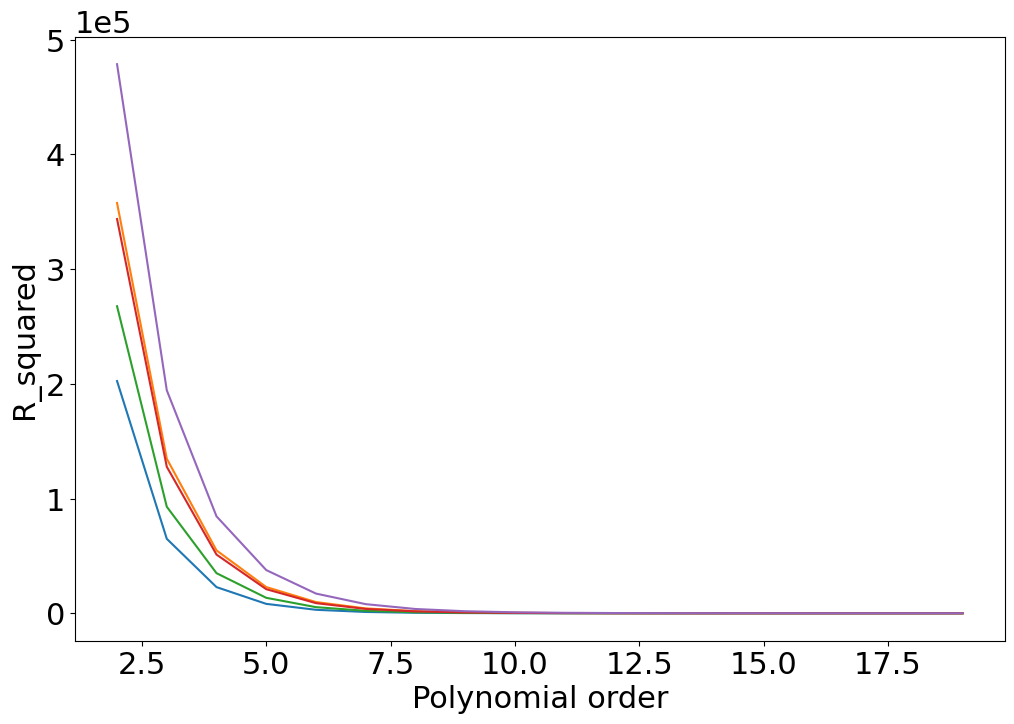

In [20]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
ax=plt.gca()
energ=[5,10,15,20,25]
for E in energ:
    abs=[i for i in range(2,20)]
    ord=[]
    for i in range(2,20):
        R0=rad_ener(E,p_inf)
        U0 = [R0, 0]
        t_burst=t2burst(R0,rho_l,p_inf,p_v)
        t = np.linspace(0, int(t_burst*1E6)+10,100000)
        t=t*1E-6
        Us = odeint(Ray_Ple, U0, t)
        Rs = Us[:,0]
        Vs = Us[:,1]

        fit=np.polynomial.Polynomial.fit(t[np.argmin(Rs)]-t,-Vs,i,full=True)
        ord.append(fit[1][0])

    ax.plot(abs,ord)
plt.tight_layout
plt.xlabel("Polynomial order")
plt.ylabel("R_squared")

plt.ticklabel_format(style='sci', axis='y', scilimits=(1,4))
legend = ax1.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()




##Automated simplified model


module import


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### collect data


In [ ]:
def extract_from_text(txt,name):   ##name example : "spu_0.02"
    data=[]
    with open(txt,'r') as dat:
        lines=dat.readlines()
        for line in lines[8:]:
            data.append(list(map(float,line.split())))

    pd.DataFrame(np.array(data)).to_csv(name+".csv",index=False)
    return 

In [ ]:
extract_from_text("/content/comsol_data_test_2.txt","test2")

In [ ]:
data=pd.read_csv("test2.csv",dtype='float64')
data.columns = ['X','Y','Z','Val']

In [ ]:
val_data=data['Val']

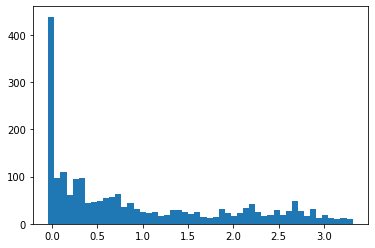

In [ ]:
plt.hist(val_data, bins=50)
plt.show()

### smooth data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import normalize
from scipy.spatial import distance



def get_data_2D(file):
    # Load data from CSV
    data=pd.read_csv(file,dtype='float64')
    data.columns = ['X','Y','Z','Val']
    X_dat = data['X']
    Y_dat = data['Y']
    Z_dat = data['Z']
    Val_dat= data['Val']

    # Convert from pandas dataframes to numpy arrays
    X, Y, Z, V= np.array([]), np.array([]), np.array([]), np.array([])
    for i in range(len(X_dat)):
            X = np.append(X, X_dat[i])
            Y = np.append(Y, Y_dat[i])
            Z = np.append(Z, Z_dat[i])
            V = np.append(V, Val_dat[i])

    # create x-y points to be used in heatmap
    xi = np.linspace(X.min(), X.max(), 1000)
    yi = np.linspace(Y.min(), Y.max(), 1000)
    
    # Interpolate for plotting
    vi = griddata((X, Y), V, (xi[None,:], yi[:,None]), method='nearest')
    return xi,yi,Z.mean(),vi


def get_data_3D(file):
    # Load data from CSV
    data=pd.read_csv(file,dtype='float64')
    data.columns = ['X','Y','Z','Val']
    X_dat = data['X']
    Y_dat = data['Y']
    Z_dat = data['Z']
    Val_dat= data['Val']

    # Convert from pandas dataframes to numpy arrays
    X, Y, Z, Val= np.array([]), np.array([]), np.array([]), np.array([])
    for i in range(len(X_dat)):
            X = np.append(X, X_dat[i])
            Y = np.append(Y, Y_dat[i])
            Z = np.append(Z, Z_dat[i])
            V = np.append(V, Val_dat[i])

    # create x-y points to be used in heatmap
    xi = np.linspace(X.min(), X.max(), 1000)
    yi = np.linspace(Y.min(), Y.max(), 1000)
    zi = np.linsapce(Z.min(), Z.max(), 1000)
    
    # Interpolate for plotting
    vi = griddata((X, Y, Z), V, (xi[None,:], yi[:,None], zi[:,None]), method='nearest')
    return xi,yi,zi,vi

# from numpy import array
# from scipy.interpolate import RegularGridInterpolator as rgi
# my_interpolating_function = rgi((x,y,z), V)
# Vi = my_interpolating_function(array([xi,yi,zi]).T)

NameError: ignored

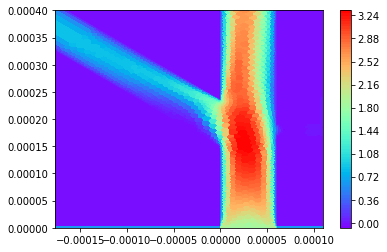

In [ ]:
# Create the contour plot
xi,yi,zi,vi=get_data_2D("test2.csv")
CS = plt.contourf(xi, yi, vi, 100, cmap=plt.cm.rainbow)

plt.colorbar()
plt.show()

In [ ]:
class Fluid(object):
    def __init__(self,rho,mu):

        self.rho=rho
        self.mu=mu



class Particle(object):
    def __init__(self,rad,pos,sp,acc,d):
       
        self.rad = rad                   # particle radius
        self.pos = pos                   # particle position
        self.sp = sp                     # particle speed
        self.acc = acc                   # particle acceleration
        self.d = d                       # particle density
        self.m = d*(4/3)**np.pi*rad**3   # particle mass
        self.s = np.pi*rad**2            # particle slice surface

    def new_pos(self,fluid,speed_field,dt):
        f=force(fluid,speed_field)
        pos=self.pos+self.sp*dt
        sp=self.sp+self.acc*dt
        acc=(1/self.m)*f
        return [pos,sp,acc]

    def update(new):
        self.pos=new[0]
        self.sp=new[1]
        self.acc=new[2]
        return
    
    def force(self,fluid,speed_field):
        ## pos dependant
        closest_pt_idx = distance.cdist(self.pos,speed_field).argmin()
        [u,v,w]=speed_field[closest_pt_idx]
        [partu,partv,partw]=self.sp
        Fx=(((((rad^2)*np.pi)*fluid.rho)*(np.sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps))))*(u-(partu)))*(((((((((sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps)))*2)*rad)*fluid.rho)/fluid.mu)^(-0.31))*1.84)+(((((((sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps)))*2)*rad)*fluid.rho)/fluid.mu)^0.06)*0.293))^3.45) 
        Fy=(((((rad^2)*np.pi)*fluid.rho)*(np.sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps))))*(v-(partv)))*(((((((((sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps)))*2)*rad)*fluid.rho)/fluid.mu)^(-0.31))*1.84)+(((((((sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps)))*2)*rad)*fluid.rho)/fluid.mu)^0.06)*0.293))^3.45) 
        Fz=(((((rad^2)*np.pi)*fluid.rho)*(np.sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps))))*(w-(partw)))*(((((((((sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps)))*2)*rad)*fluid.rho)/fluid.mu)^(-0.31))*1.84)+(((((((sqrt(((u-(partu))*(u-(partu))+(v-(partv))*(v-(partv))+(w-(partw))*(w-(partw)))+((1^2)*eps)))*2)*rad)*fluid.rho)/fluid.mu)^0.06)*0.293))^3.45) 
        return [Fx,Fy,Fz]

In [ ]:
a=Particle(10,[1,2,3],[1,2,3],[1,2,3],10)

a.pos=[4,5,6]
a.pos

[4, 5, 6]

In [ ]:
def efficiency(channel_dim,sp_folder,dt,rad=40e-6,fluid=Fluid(1000,8.9e-4),nb_part=100):
    speed_files=glob.glob("sp_folder"+"*")
    speed_table=[]
    time_table=[dt*i for i in range(len(speed_files))]
    for field in speed_files:
        speed_table.append(get_data(field))
    
    start_pos= [np.random.uniform(low=0, high=channel_dim[0], size=(2,)) for i in range(nb_part)]

    counter=0
    for start_pos in start_pos:
        part=Particle(rad,start_pos,[0,0,0],[0,0,0],1500)
        for field in speed_table:
            new_pos=part.new_pos(fluid,field,dt)
            if new_pos[0][0]-rad<0 and (1.5e-4+rad<new_pos[0][0]<2e-4-rad)!:  #bumps left
                new_pos[0][0]=rad
                new_pos[1][0]=0
            if new_pos[0][0]>channel_dim[0]-rad:                               #bumps right
                new_pos[0][0]=channel_dim[0]-rad
                new_pos[1][0]=0
            if new_pos[0][2]<rad:                                           #bumps down
                new_pos[0][2]=rad
                new_pos[1][2]=0
            if new_pos[0][2]>channel_dim[1]-rad:                          #bumps up
                new_pos[0][2]=channel_dim[1]-rad
                new_pos[1][2]=0
            
            part.update(new_pos)
            if part.pos[0]<channel_dim[0] : #gets into channel
                counter+=1
                break
            if part.pos[1]>2e-4 :           #doesnt get into channel
                break


    return "efficiency is %s/%s".format(counter,nb_part)








In [ ]:
def test():
  return [1,2,3]

def test2(new):
  return new[0]+new[1]+new[2]
        
test2(test())

6